# Progetto DSLab: <br>Riconoscimento dei parassiti della malaria nelle cellule

## Caricamento delle librerie e path da cui caricare le immagini

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import pandas as pd
import os

In [2]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

GPU Available:  True


Using TensorFlow backend.


In [3]:
# !pip install -q tensorflow-gpu==2.0.0-beta1 --ignore-installed
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

from keras import backend as K

cellule = "H:/Università/Magistrale/1° Anno/Secondo Semestre/Data Science Lab/Progetto/Cellule"

In [4]:
import time
import datetime
from tqdm import tqdm
from tensorflow.keras.callbacks import TensorBoard

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12598373739687969565, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1454299545
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6728665701647090439
 physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [7]:
%load_ext tensorboard

The tensorboard module is not an IPython extension.


## Si impostano le cartelle da cui prelevare le immagini e si stampano le prime tre immagini

In [8]:
infette = os.listdir(cellule + "/Parasitized")
sane = os.listdir(cellule + "/Uninfected")

### Nomi di alcune immagini prelevati dalle due cartelle

In [9]:
print(infette[0])
print("\n")
print(sane[0])

C100P61ThinF_IMG_20150918_144104_cell_162.png


C100P61ThinF_IMG_20150918_144104_cell_128.png


### Stampa di alcune immagini provenienti da Parasitized

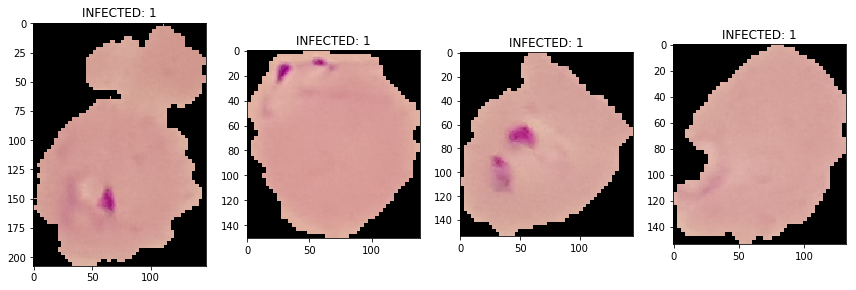

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = plt.imread(cellule + "/" + "Parasitized" + "/" + infette[i+1])
    plt.imshow(img)
    plt.title('INFECTED: 1')
    plt.tight_layout()
plt.show()

### Stampa di alcune immagini provenienti da Uninfected

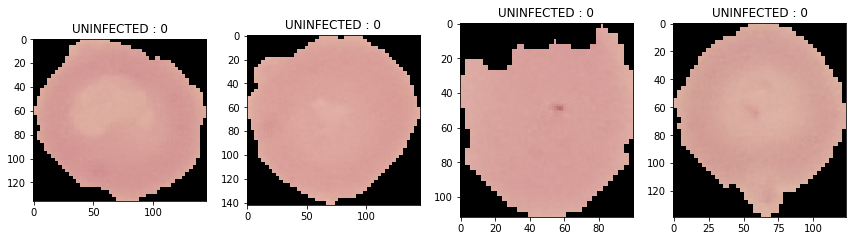

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = plt.imread(cellule + "/" + "Uninfected" + "/" + sane[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

## Caricamento dei dati nella lista "data", nella lista "labels" inserisco invece il tipo categorico di cellula

In [12]:
data = []
labels = []
for img in tqdm(infette):
    try:
        img_read = plt.imread(cellule + "/Parasitized/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in tqdm(sane):
    try:
        img_read = plt.imread(cellule + "/Uninfected/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [00:19<00:00, 698.03it/s]


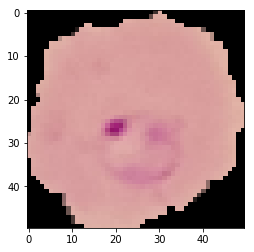

In [13]:
plt.imshow(data[0])
plt.show()

### Converto le liste di immagini e label in array numpy

In [14]:
immagini = np.array(data)
label = np.array(labels)

### Si associa ad n il numero di righe dell'array

In [15]:
n = np.arange(immagini.shape[0])
np.random.shuffle(n)

immagini = immagini[n]
label = label[n]

## Separazione del Dataset in Train Set e Test Set (come richiesto da NN)

In [16]:
#qui inserisco un plot per far vedere la distribuzione delle due categorie
d = list(zip(immagini, label))

In [17]:
dati = pd.DataFrame(data = d, columns=["immagini", "labels"])

In [18]:
dati.head()

,immagini,labels
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
4,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1


In [19]:
train, test = train_test_split(dati, test_size = 0.3, stratify = dati["labels"])

x_train = train["immagini"]
y_train = train["labels"]

x_test = test["immagini"]
y_test = test["labels"]

### Trasformo la shape delle immagini

In [20]:
x_train = np.array(list(x_train)).reshape(-1, 50, 50, 3)
x_test = np.array(list(x_test)).reshape(-1, 50, 50, 3)


In [21]:
x_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

### Trasformo in categorici i valori di y_train e y_test "label"

In [22]:
'''y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)'''

'y_train = np_utils.to_categorical(y_train, num_classes = 2)\ny_test = np_utils.to_categorical(y_test, num_classes = 2)'

## Creazione del Modello (NN)

In [ ]:
np.shape(x_train)

### Import delle componenti necessarie

### Definizione del modello

In [23]:
keras.backend.clear_session()

In [24]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (4, 4), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compilazione del modello (funzione di loss "binary_crossentropy")

In [25]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ['accuracy'])

### Fit del modello sul Train Set

In [26]:
## Creates a graph.
#a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#c = tf.matmul(a, b)
## Creates a session with log_device_placement set to True.
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
## Runs the op.
#print(sess.run(c))

In [27]:
logdir="C:\\Users\\paolo\\Desktop\\LOGSTANDARD"
tensorboard = TensorBoard(logdir)
with tf.device('/device:GPU:0'):
    history = model.fit(x_train, y_train,
                        epochs = 30,
                        batch_size = 200,
                        validation_split = 0.3,
                       callbacks = [tensorboard])

Train on 13503 samples, validate on 5787 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
13503/13503 [==============================] - ETA: 3:13 - loss: 0.6944 - acc: 0.520 - ETA: 1:40 - loss: 0.7997 - acc: 0.520 - ETA: 1:09 - loss: 0.7770 - acc: 0.521 - ETA: 54s - loss: 0.7607 - acc: 0.513 - ETA: 44s - loss: 0.7499 - acc: 0.52 - ETA: 38s - loss: 0.7454 - acc: 0.52 - ETA: 33s - loss: 0.7437 - acc: 0.51 - ETA: 30s - loss: 0.7380 - acc: 0.51 - ETA: 27s - loss: 0.7332 - acc: 0.52 - ETA: 25s - loss: 0.7310 - acc: 0.52 - ETA: 23s - loss: 0.7280 - acc: 0.52 - ETA: 22s - loss: 0.7278 - acc: 0.51 - ETA: 20s - loss: 0.7256 - acc: 0.51 - ETA: 19s - loss: 0.7230 - acc: 0.52 - ETA: 18s - loss: 0.7214 - acc: 0.52 - ETA: 17s - loss: 0.7203 - acc: 0.51 - ETA: 16s - loss: 0.7176 - acc: 0.52 - ETA: 15s - loss: 0.7172 - acc: 0.52 - ETA: 15s - loss: 0.7172 - acc: 0.51 - ETA: 14s - loss: 0.7161 - acc: 0.51 - ETA: 13s - loss: 0.7150 - acc: 0.51 - ETA: 13s - loss: 0.7139 - acc: 0.51 - ET

13503/13503 [==============================] - ETA: 11s - loss: 0.5405 - acc: 0.72 - ETA: 11s - loss: 0.5162 - acc: 0.75 - ETA: 10s - loss: 0.5222 - acc: 0.75 - ETA: 10s - loss: 0.5163 - acc: 0.75 - ETA: 10s - loss: 0.5181 - acc: 0.74 - ETA: 10s - loss: 0.5117 - acc: 0.75 - ETA: 10s - loss: 0.5136 - acc: 0.75 - ETA: 10s - loss: 0.5169 - acc: 0.75 - ETA: 9s - loss: 0.5215 - acc: 0.7528 - ETA: 9s - loss: 0.5286 - acc: 0.746 - ETA: 9s - loss: 0.5231 - acc: 0.748 - ETA: 9s - loss: 0.5234 - acc: 0.746 - ETA: 9s - loss: 0.5233 - acc: 0.748 - ETA: 9s - loss: 0.5192 - acc: 0.752 - ETA: 8s - loss: 0.5172 - acc: 0.755 - ETA: 8s - loss: 0.5154 - acc: 0.757 - ETA: 8s - loss: 0.5148 - acc: 0.758 - ETA: 8s - loss: 0.5148 - acc: 0.758 - ETA: 8s - loss: 0.5133 - acc: 0.759 - ETA: 8s - loss: 0.5163 - acc: 0.755 - ETA: 7s - loss: 0.5156 - acc: 0.756 - ETA: 7s - loss: 0.5152 - acc: 0.757 - ETA: 7s - loss: 0.5170 - acc: 0.755 - ETA: 7s - loss: 0.5144 - acc: 0.758 - ETA: 7s - loss: 0.5138 - acc: 0.759 - ET

13503/13503 [==============================] - ETA: 11s - loss: 0.3473 - acc: 0.85 - ETA: 11s - loss: 0.3222 - acc: 0.87 - ETA: 11s - loss: 0.3412 - acc: 0.85 - ETA: 10s - loss: 0.3346 - acc: 0.85 - ETA: 10s - loss: 0.3518 - acc: 0.85 - ETA: 10s - loss: 0.3549 - acc: 0.85 - ETA: 10s - loss: 0.3567 - acc: 0.85 - ETA: 10s - loss: 0.3652 - acc: 0.84 - ETA: 10s - loss: 0.3663 - acc: 0.84 - ETA: 9s - loss: 0.3687 - acc: 0.8465 - ETA: 9s - loss: 0.3678 - acc: 0.846 - ETA: 9s - loss: 0.3659 - acc: 0.850 - ETA: 9s - loss: 0.3644 - acc: 0.851 - ETA: 9s - loss: 0.3643 - acc: 0.852 - ETA: 8s - loss: 0.3631 - acc: 0.854 - ETA: 8s - loss: 0.3641 - acc: 0.852 - ETA: 8s - loss: 0.3617 - acc: 0.852 - ETA: 8s - loss: 0.3628 - acc: 0.851 - ETA: 8s - loss: 0.3606 - acc: 0.852 - ETA: 8s - loss: 0.3612 - acc: 0.852 - ETA: 7s - loss: 0.3604 - acc: 0.854 - ETA: 7s - loss: 0.3605 - acc: 0.853 - ETA: 7s - loss: 0.3585 - acc: 0.856 - ETA: 7s - loss: 0.3609 - acc: 0.856 - ETA: 7s - loss: 0.3611 - acc: 0.855 - ET

13503/13503 [==============================] - ETA: 11s - loss: 0.3176 - acc: 0.87 - ETA: 11s - loss: 0.2907 - acc: 0.89 - ETA: 10s - loss: 0.2817 - acc: 0.89 - ETA: 10s - loss: 0.2963 - acc: 0.88 - ETA: 10s - loss: 0.2983 - acc: 0.88 - ETA: 10s - loss: 0.2983 - acc: 0.88 - ETA: 10s - loss: 0.3083 - acc: 0.87 - ETA: 10s - loss: 0.3138 - acc: 0.87 - ETA: 10s - loss: 0.3113 - acc: 0.87 - ETA: 9s - loss: 0.3114 - acc: 0.8720 - ETA: 9s - loss: 0.3076 - acc: 0.877 - ETA: 9s - loss: 0.3088 - acc: 0.878 - ETA: 9s - loss: 0.3108 - acc: 0.877 - ETA: 9s - loss: 0.3083 - acc: 0.879 - ETA: 9s - loss: 0.3118 - acc: 0.877 - ETA: 8s - loss: 0.3127 - acc: 0.876 - ETA: 8s - loss: 0.3198 - acc: 0.872 - ETA: 8s - loss: 0.3186 - acc: 0.873 - ETA: 8s - loss: 0.3164 - acc: 0.874 - ETA: 8s - loss: 0.3201 - acc: 0.872 - ETA: 7s - loss: 0.3222 - acc: 0.870 - ETA: 7s - loss: 0.3209 - acc: 0.872 - ETA: 7s - loss: 0.3193 - acc: 0.873 - ETA: 7s - loss: 0.3211 - acc: 0.873 - ETA: 7s - loss: 0.3246 - acc: 0.873 - ET

13503/13503 [==============================] - ETA: 11s - loss: 0.3643 - acc: 0.86 - ETA: 11s - loss: 0.3665 - acc: 0.85 - ETA: 10s - loss: 0.3294 - acc: 0.87 - ETA: 10s - loss: 0.3315 - acc: 0.87 - ETA: 10s - loss: 0.3453 - acc: 0.87 - ETA: 10s - loss: 0.3465 - acc: 0.86 - ETA: 10s - loss: 0.3389 - acc: 0.87 - ETA: 10s - loss: 0.3393 - acc: 0.86 - ETA: 9s - loss: 0.3313 - acc: 0.8717 - ETA: 9s - loss: 0.3275 - acc: 0.872 - ETA: 9s - loss: 0.3222 - acc: 0.875 - ETA: 9s - loss: 0.3159 - acc: 0.878 - ETA: 9s - loss: 0.3091 - acc: 0.880 - ETA: 9s - loss: 0.3109 - acc: 0.877 - ETA: 8s - loss: 0.3111 - acc: 0.877 - ETA: 8s - loss: 0.3100 - acc: 0.877 - ETA: 8s - loss: 0.3067 - acc: 0.879 - ETA: 8s - loss: 0.3085 - acc: 0.878 - ETA: 8s - loss: 0.3097 - acc: 0.877 - ETA: 8s - loss: 0.3064 - acc: 0.879 - ETA: 7s - loss: 0.3045 - acc: 0.880 - ETA: 7s - loss: 0.3052 - acc: 0.880 - ETA: 7s - loss: 0.3033 - acc: 0.880 - ETA: 7s - loss: 0.3055 - acc: 0.880 - ETA: 7s - loss: 0.3061 - acc: 0.880 - ET

13503/13503 [==============================] - ETA: 11s - loss: 0.2848 - acc: 0.91 - ETA: 11s - loss: 0.2893 - acc: 0.90 - ETA: 10s - loss: 0.2696 - acc: 0.89 - ETA: 10s - loss: 0.2542 - acc: 0.90 - ETA: 10s - loss: 0.2570 - acc: 0.90 - ETA: 10s - loss: 0.2587 - acc: 0.90 - ETA: 10s - loss: 0.2631 - acc: 0.89 - ETA: 10s - loss: 0.2760 - acc: 0.89 - ETA: 9s - loss: 0.2798 - acc: 0.8906 - ETA: 9s - loss: 0.2852 - acc: 0.890 - ETA: 9s - loss: 0.2852 - acc: 0.889 - ETA: 9s - loss: 0.2836 - acc: 0.890 - ETA: 9s - loss: 0.2875 - acc: 0.889 - ETA: 9s - loss: 0.2862 - acc: 0.888 - ETA: 8s - loss: 0.2904 - acc: 0.886 - ETA: 8s - loss: 0.2894 - acc: 0.887 - ETA: 8s - loss: 0.2864 - acc: 0.887 - ETA: 8s - loss: 0.2848 - acc: 0.888 - ETA: 8s - loss: 0.2841 - acc: 0.888 - ETA: 8s - loss: 0.2815 - acc: 0.889 - ETA: 7s - loss: 0.2828 - acc: 0.889 - ETA: 7s - loss: 0.2817 - acc: 0.890 - ETA: 7s - loss: 0.2824 - acc: 0.889 - ETA: 7s - loss: 0.2800 - acc: 0.890 - ETA: 7s - loss: 0.2805 - acc: 0.890 - ET

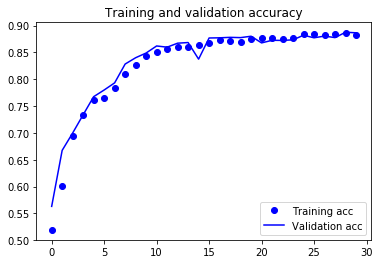

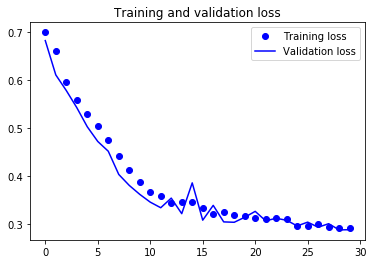

In [28]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("C:\\Users\\paolo\\Desktop\\accuracycellulestandard.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("C:\\Users\\paolo\\Desktop\\losscellulestandard.png")


plt.show()

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("TEST LOSS : " , test_loss)
print("TEST ACCURACY : " , test_acc)

#accuracy: 88%

8268/8268 [==============================] - ETA: 15s - loss: 0.2170 - acc: 0.87 - ETA: 5s - loss: 0.2563 - acc: 0.8750 - ETA: 4s - loss: 0.2839 - acc: 0.877 - ETA: 3s - loss: 0.2701 - acc: 0.892 - ETA: 3s - loss: 0.2931 - acc: 0.882 - ETA: 3s - loss: 0.2929 - acc: 0.883 - ETA: 3s - loss: 0.2979 - acc: 0.883 - ETA: 2s - loss: 0.2960 - acc: 0.882 - ETA: 2s - loss: 0.2932 - acc: 0.880 - ETA: 2s - loss: 0.2969 - acc: 0.880 - ETA: 2s - loss: 0.2935 - acc: 0.882 - ETA: 2s - loss: 0.2877 - acc: 0.884 - ETA: 2s - loss: 0.2881 - acc: 0.884 - ETA: 2s - loss: 0.2830 - acc: 0.888 - ETA: 2s - loss: 0.2846 - acc: 0.886 - ETA: 2s - loss: 0.2806 - acc: 0.889 - ETA: 2s - loss: 0.2815 - acc: 0.889 - ETA: 2s - loss: 0.2850 - acc: 0.889 - ETA: 2s - loss: 0.2845 - acc: 0.889 - ETA: 2s - loss: 0.2842 - acc: 0.889 - ETA: 2s - loss: 0.2888 - acc: 0.888 - ETA: 2s - loss: 0.2866 - acc: 0.888 - ETA: 2s - loss: 0.2825 - acc: 0.890 - ETA: 2s - loss: 0.2838 - acc: 0.889 - ETA: 1s - loss: 0.2810 - acc: 0.890 - ETA:

In [30]:
test_loss

0.27071437923067365

In [31]:
test_acc

0.8942912

## Prova più reti neurali

### Da provare nel prompt

In [ ]:
#!rm -rf ./logs/ 

# ESEGUIRE IN ANANCODA PROMPT: <br>
%tensorboard --logdir="logs/" --host=127.0.0.1

In [ ]:
dense_layers = [0,1,2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

with tf.device('/device:GPU:0'):
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
                print(NAME)

                model = tf.keras.models.Sequential()

                model.add(Conv2D(layer_size, (3, 3), input_shape=(50,50,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for l in range(conv_layer-1):
                    model.add(Conv2D(layer_size, (3, 3)))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                for _ in range(dense_layer):
                    model.add(Dense(layer_size))
                    model.add(Activation('relu'))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

                model.compile(loss='binary_crossentropy',
                              optimizer='adam',
                              metrics=['accuracy'])
                log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
                
                model.fit(x_train, y_train,
                          batch_size=32,
                          epochs=10,
                          validation_split=0.3,
                          callbacks=[tensorboard])

In [ ]:
print("ho finito")

## Migliori risultati

In [ ]:
#EPOCH VAL LOSS:
#3-conv-32-nodes-2-dense-1563986533

#EPOCH VAL ACC:
#3-conv-32-nodes-2-dense-1563986533

#EPOCH LOSS:
#2-conv-64-nodes-2-dense-1563986814

#EPOCH ACC:
#2-conv-64-nodes-2-dense-1563986814

## Miglior Modello e risultati

In [22]:
keras.backend.clear_session()

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [24]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ['accuracy'])

In [ ]:
logdir="C:\\Users\\paolo\\Desktop\\LOGOTTIMO"
tensorboard = TensorBoard(logdir)
with tf.device('/device:GPU:0'):
    history = model.fit(x_train, y_train,
                        epochs = 10,
                        batch_size = 32,
                        validation_split = 0.3,
                       callbacks = [tensorboard])

Train on 13503 samples, validate on 5787 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
13503/13503 [==============================] - ETA: 15:24 - loss: 0.8774 - acc: 0.37 - ETA: 3:55 - loss: 0.7414 - acc: 0.5312 - ETA: 2:16 - loss: 0.7261 - acc: 0.491 - ETA: 1:28 - loss: 0.7123 - acc: 0.525 - ETA: 1:10 - loss: 0.7186 - acc: 0.515 - ETA: 55s - loss: 0.7145 - acc: 0.506 - ETA: 48s - loss: 0.7092 - acc: 0.51 - ETA: 41s - loss: 0.7090 - acc: 0.51 - ETA: 36s - loss: 0.7086 - acc: 0.51 - ETA: 32s - loss: 0.7076 - acc: 0.50 - ETA: 28s - loss: 0.7066 - acc: 0.50 - ETA: 26s - loss: 0.7050 - acc: 0.50 - ETA: 24s - loss: 0.7033 - acc: 0.51 - ETA: 22s - loss: 0.7009 - acc: 0.51 - ETA: 21s - loss: 0.7006 - acc: 0.51 - ETA: 20s - loss: 0.6997 - acc: 0.51 - ETA: 19s - loss: 0.6999 - acc: 0.51 - ETA: 18s - loss: 0.6988 - acc: 0.51 - ETA: 17s - loss: 0.6981 - acc: 0.51 - ETA: 16s - loss: 0.6972 - acc: 0.52 - ETA: 15s - loss: 0.6969 - acc: 0.52 - ETA: 14s - loss: 0.6956 - acc: 0.52

13503/13503 [==============================] - ETA: 6s - loss: 0.3089 - acc: 0.875 - ETA: 7s - loss: 0.2999 - acc: 0.898 - ETA: 6s - loss: 0.2773 - acc: 0.902 - ETA: 6s - loss: 0.2537 - acc: 0.914 - ETA: 6s - loss: 0.2573 - acc: 0.912 - ETA: 6s - loss: 0.2617 - acc: 0.912 - ETA: 6s - loss: 0.2582 - acc: 0.914 - ETA: 6s - loss: 0.2531 - acc: 0.919 - ETA: 6s - loss: 0.2478 - acc: 0.919 - ETA: 6s - loss: 0.2450 - acc: 0.919 - ETA: 6s - loss: 0.2553 - acc: 0.916 - ETA: 6s - loss: 0.2671 - acc: 0.909 - ETA: 6s - loss: 0.2680 - acc: 0.909 - ETA: 5s - loss: 0.2642 - acc: 0.910 - ETA: 5s - loss: 0.2577 - acc: 0.913 - ETA: 5s - loss: 0.2581 - acc: 0.912 - ETA: 5s - loss: 0.2516 - acc: 0.914 - ETA: 5s - loss: 0.2496 - acc: 0.915 - ETA: 5s - loss: 0.2534 - acc: 0.913 - ETA: 5s - loss: 0.2517 - acc: 0.912 - ETA: 5s - loss: 0.2511 - acc: 0.912 - ETA: 5s - loss: 0.2516 - acc: 0.912 - ETA: 5s - loss: 0.2506 - acc: 0.912 - ETA: 5s - loss: 0.2517 - acc: 0.913 - ETA: 5s - loss: 0.2502 - acc: 0.913 - ETA

13503/13503 [==============================] - ETA: 6s - loss: 0.1681 - acc: 0.968 - ETA: 7s - loss: 0.1420 - acc: 0.960 - ETA: 6s - loss: 0.1445 - acc: 0.964 - ETA: 6s - loss: 0.1481 - acc: 0.955 - ETA: 6s - loss: 0.1507 - acc: 0.951 - ETA: 6s - loss: 0.1422 - acc: 0.954 - ETA: 6s - loss: 0.1431 - acc: 0.955 - ETA: 6s - loss: 0.1605 - acc: 0.949 - ETA: 6s - loss: 0.1652 - acc: 0.946 - ETA: 6s - loss: 0.1570 - acc: 0.950 - ETA: 6s - loss: 0.1570 - acc: 0.951 - ETA: 6s - loss: 0.1618 - acc: 0.948 - ETA: 5s - loss: 0.1616 - acc: 0.948 - ETA: 5s - loss: 0.1636 - acc: 0.947 - ETA: 5s - loss: 0.1631 - acc: 0.947 - ETA: 5s - loss: 0.1677 - acc: 0.945 - ETA: 5s - loss: 0.1648 - acc: 0.946 - ETA: 5s - loss: 0.1642 - acc: 0.946 - ETA: 5s - loss: 0.1624 - acc: 0.947 - ETA: 5s - loss: 0.1589 - acc: 0.948 - ETA: 5s - loss: 0.1576 - acc: 0.949 - ETA: 5s - loss: 0.1578 - acc: 0.949 - ETA: 5s - loss: 0.1586 - acc: 0.949 - ETA: 5s - loss: 0.1553 - acc: 0.951 - ETA: 5s - loss: 0.1546 - acc: 0.951 - ETA

13503/13503 [==============================] - ETA: 6s - loss: 0.0481 - acc: 1.000 - ETA: 6s - loss: 0.0721 - acc: 0.976 - ETA: 6s - loss: 0.1222 - acc: 0.960 - ETA: 6s - loss: 0.1873 - acc: 0.942 - ETA: 6s - loss: 0.1687 - acc: 0.949 - ETA: 6s - loss: 0.1696 - acc: 0.946 - ETA: 6s - loss: 0.1624 - acc: 0.949 - ETA: 6s - loss: 0.1567 - acc: 0.952 - ETA: 6s - loss: 0.1501 - acc: 0.954 - ETA: 6s - loss: 0.1472 - acc: 0.957 - ETA: 6s - loss: 0.1450 - acc: 0.957 - ETA: 6s - loss: 0.1460 - acc: 0.957 - ETA: 6s - loss: 0.1576 - acc: 0.951 - ETA: 6s - loss: 0.1539 - acc: 0.952 - ETA: 6s - loss: 0.1487 - acc: 0.954 - ETA: 6s - loss: 0.1492 - acc: 0.954 - ETA: 6s - loss: 0.1517 - acc: 0.953 - ETA: 5s - loss: 0.1515 - acc: 0.953 - ETA: 6s - loss: 0.1567 - acc: 0.951 - ETA: 6s - loss: 0.1530 - acc: 0.952 - ETA: 5s - loss: 0.1526 - acc: 0.952 - ETA: 5s - loss: 0.1514 - acc: 0.952 - ETA: 5s - loss: 0.1528 - acc: 0.952 - ETA: 5s - loss: 0.1494 - acc: 0.953 - ETA: 5s - loss: 0.1487 - acc: 0.953 - ETA

13503/13503 [==============================] - ETA: 7s - loss: 0.2524 - acc: 0.906 - ETA: 7s - loss: 0.1793 - acc: 0.937 - ETA: 6s - loss: 0.1566 - acc: 0.957 - ETA: 6s - loss: 0.1678 - acc: 0.950 - ETA: 6s - loss: 0.1673 - acc: 0.950 - ETA: 6s - loss: 0.1702 - acc: 0.947 - ETA: 6s - loss: 0.1635 - acc: 0.948 - ETA: 6s - loss: 0.1599 - acc: 0.951 - ETA: 6s - loss: 0.1671 - acc: 0.950 - ETA: 6s - loss: 0.1685 - acc: 0.951 - ETA: 6s - loss: 0.1646 - acc: 0.951 - ETA: 6s - loss: 0.1574 - acc: 0.954 - ETA: 6s - loss: 0.1540 - acc: 0.954 - ETA: 6s - loss: 0.1539 - acc: 0.956 - ETA: 6s - loss: 0.1515 - acc: 0.955 - ETA: 6s - loss: 0.1552 - acc: 0.953 - ETA: 5s - loss: 0.1560 - acc: 0.953 - ETA: 5s - loss: 0.1544 - acc: 0.953 - ETA: 5s - loss: 0.1499 - acc: 0.954 - ETA: 5s - loss: 0.1475 - acc: 0.955 - ETA: 5s - loss: 0.1445 - acc: 0.956 - ETA: 5s - loss: 0.1431 - acc: 0.956 - ETA: 5s - loss: 0.1434 - acc: 0.955 - ETA: 5s - loss: 0.1474 - acc: 0.953 - ETA: 5s - loss: 0.1479 - acc: 0.952 - ETA

13503/13503 [==============================] - ETA: 6s - loss: 0.0677 - acc: 0.968 - ETA: 6s - loss: 0.1297 - acc: 0.950 - ETA: 6s - loss: 0.1142 - acc: 0.957 - ETA: 6s - loss: 0.1163 - acc: 0.963 - ETA: 6s - loss: 0.1036 - acc: 0.970 - ETA: 6s - loss: 0.1000 - acc: 0.970 - ETA: 6s - loss: 0.0914 - acc: 0.974 - ETA: 6s - loss: 0.0984 - acc: 0.972 - ETA: 6s - loss: 0.1102 - acc: 0.966 - ETA: 6s - loss: 0.1053 - acc: 0.968 - ETA: 6s - loss: 0.1025 - acc: 0.969 - ETA: 6s - loss: 0.1131 - acc: 0.967 - ETA: 5s - loss: 0.1150 - acc: 0.966 - ETA: 5s - loss: 0.1230 - acc: 0.964 - ETA: 5s - loss: 0.1216 - acc: 0.964 - ETA: 5s - loss: 0.1232 - acc: 0.964 - ETA: 5s - loss: 0.1260 - acc: 0.963 - ETA: 5s - loss: 0.1310 - acc: 0.960 - ETA: 5s - loss: 0.1308 - acc: 0.959 - ETA: 5s - loss: 0.1318 - acc: 0.960 - ETA: 5s - loss: 0.1328 - acc: 0.960 - ETA: 5s - loss: 0.1367 - acc: 0.957 - ETA: 5s - loss: 0.1359 - acc: 0.957 - ETA: 5s - loss: 0.1369 - acc: 0.957 - ETA: 5s - loss: 0.1391 - acc: 0.956 - ETA

13503/13503 [==============================] - ETA: 7s - loss: 0.0700 - acc: 1.000 - ETA: 6s - loss: 0.1316 - acc: 0.962 - ETA: 6s - loss: 0.1369 - acc: 0.958 - ETA: 6s - loss: 0.1224 - acc: 0.963 - ETA: 6s - loss: 0.1185 - acc: 0.961 - ETA: 6s - loss: 0.1240 - acc: 0.961 - ETA: 6s - loss: 0.1143 - acc: 0.963 - ETA: 6s - loss: 0.1104 - acc: 0.965 - ETA: 6s - loss: 0.1155 - acc: 0.965 - ETA: 5s - loss: 0.1139 - acc: 0.966 - ETA: 5s - loss: 0.1102 - acc: 0.968 - ETA: 5s - loss: 0.1057 - acc: 0.968 - ETA: 5s - loss: 0.1083 - acc: 0.968 - ETA: 5s - loss: 0.1111 - acc: 0.968 - ETA: 5s - loss: 0.1105 - acc: 0.967 - ETA: 5s - loss: 0.1214 - acc: 0.964 - ETA: 5s - loss: 0.1243 - acc: 0.962 - ETA: 5s - loss: 0.1223 - acc: 0.962 - ETA: 5s - loss: 0.1225 - acc: 0.963 - ETA: 5s - loss: 0.1194 - acc: 0.963 - ETA: 5s - loss: 0.1193 - acc: 0.963 - ETA: 5s - loss: 0.1193 - acc: 0.963 - ETA: 5s - loss: 0.1185 - acc: 0.964 - ETA: 5s - loss: 0.1186 - acc: 0.964 - ETA: 5s - loss: 0.1185 - acc: 0.964 - ETA

13503/13503 [==============================] - ETA: 6s - loss: 0.1078 - acc: 0.968 - ETA: 6s - loss: 0.1286 - acc: 0.956 - ETA: 6s - loss: 0.1611 - acc: 0.951 - ETA: 6s - loss: 0.1589 - acc: 0.954 - ETA: 6s - loss: 0.1490 - acc: 0.957 - ETA: 6s - loss: 0.1413 - acc: 0.959 - ETA: 6s - loss: 0.1478 - acc: 0.957 - ETA: 6s - loss: 0.1407 - acc: 0.960 - ETA: 6s - loss: 0.1373 - acc: 0.960 - ETA: 6s - loss: 0.1331 - acc: 0.960 - ETA: 5s - loss: 0.1290 - acc: 0.961 - ETA: 5s - loss: 0.1260 - acc: 0.963 - ETA: 5s - loss: 0.1265 - acc: 0.962 - ETA: 5s - loss: 0.1278 - acc: 0.961 - ETA: 5s - loss: 0.1301 - acc: 0.960 - ETA: 5s - loss: 0.1329 - acc: 0.958 - ETA: 5s - loss: 0.1310 - acc: 0.957 - ETA: 5s - loss: 0.1308 - acc: 0.957 - ETA: 5s - loss: 0.1288 - acc: 0.958 - ETA: 5s - loss: 0.1282 - acc: 0.958 - ETA: 5s - loss: 0.1282 - acc: 0.957 - ETA: 5s - loss: 0.1262 - acc: 0.957 - ETA: 5s - loss: 0.1236 - acc: 0.959 - ETA: 5s - loss: 0.1237 - acc: 0.959 - ETA: 5s - loss: 0.1216 - acc: 0.960 - ETA

In [ ]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("C:\\Users\\paolo\\Desktop\\accuracycelluleottimo.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("C:\\Users\\paolo\\Desktop\\losscelluleottimo.png")


plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
test_loss

In [ ]:
test_acc

In [ ]:
print("HO FINITO")